In [48]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['PingFang HK']   # 或 'PingFang TC', 'PingFang SC'
plt.rcParams['axes.unicode_minus'] = False

# 設置一百個賭徒
gamblers = 100

# 定義一個賭場方法
def casino(win_rate, win_once=1, lose_once=1, commission=0.01):
    """
        設定每個賭徒都有1,000,000元
        設定每次賭博贏錢的機率為win_rate
        設定每次賭博贏錢的金額為win_once
        設定每次賭博輸錢的金額為lose_once
        設定每次賭博的賭場抽成為commission（類似交易手續費）
        每個人都會下注10000000次
    """
    my_money = 1000000
    play_cnt = 100000
    commission = commission
    
    for _ in np.arange(play_cnt):
        # 使用伯努利分布根據win_rate來決定輸贏
        w = np.random.binomial(1, win_rate)
        if w:
            my_money += win_once
        else:
            my_money -= lose_once
        my_money -= commission
        # 沒錢就不玩了
        if my_money <= 0:
            break
    return my_money

# 快速版賭場，不慢慢等迴圈跑
def casino_fast(win_rate, win_once=1, lose_once=1, commission=0.01):
    my_money = 1000000
    play_cnt = 100000
    
    # 一次生成全部輸贏結果，0=輸 1=贏
    results = np.random.binomial(1, win_rate, play_cnt)
    
    # 把輸贏轉成金額變化
    money_change = results * win_once - (1 - results) * lose_once - commission
    
    # 累積變化直到破產
    cumulative = my_money + np.cumsum(money_change)
    
    # 找破產點
    bankrupt_index = np.where(cumulative <= 0)[0]
    
    if len(bankrupt_index) > 0:
        return 0
    else:
        return cumulative[-1]

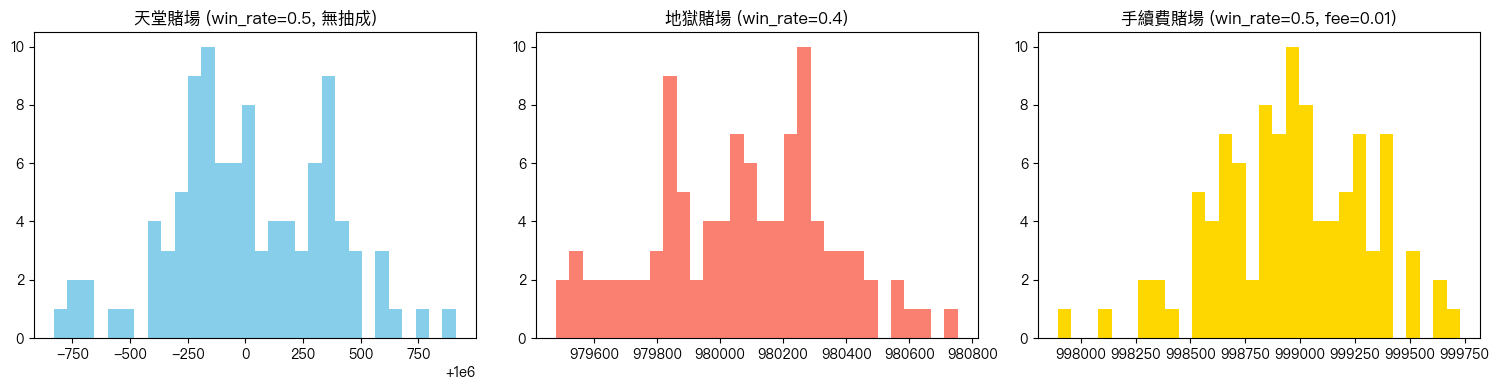

In [49]:
# 1.假如是天堂賭場，沒有老千也沒有抽成的情況：
# 2.假如賭場有老千，勝率只有40%的情況
# 3.假如賭場有抽成，勝率50%，但是有0.01的手續費

heaven_moneys = [casino_fast(win_rate=0.5, commission=0) for _ in range(gamblers)]
cheat_moneys = [casino_fast(win_rate=0.4, commission=0) for _ in range(gamblers)]
fee_moneys = [casino_fast(win_rate=0.5, commission=0.01) for _ in range(gamblers)]

# 分別視覺化上面三種狀況
fig, axs = plt.subplots(1, 3, figsize=(15, 4))  # 一行三張圖

# 天堂賭場
axs[0].hist(heaven_moneys, bins=30, color='skyblue')
axs[0].set_title("天堂賭場 (win_rate=0.5, 無抽成)")

# 地獄賭場（老千）
axs[1].hist(cheat_moneys, bins=30, color='salmon')
axs[1].set_title("地獄賭場 (win_rate=0.4)")

# 手續費賭場
axs[2].hist(fee_moneys, bins=30, color='gold')
axs[2].set_title("手續費賭場 (win_rate=0.5, fee=0.01)")

plt.tight_layout()
plt.show()


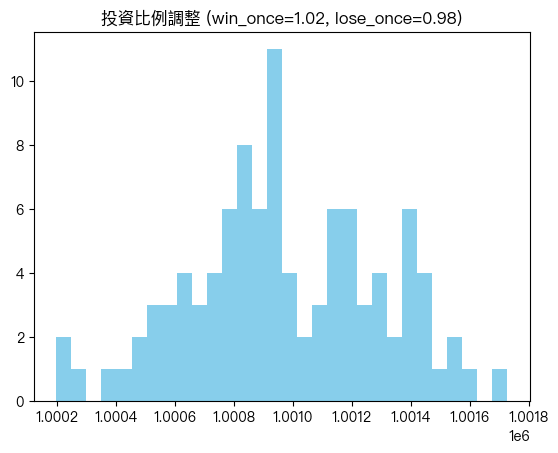

In [ ]:
# 投資沒辦法自己是“老千”（有內線？），那能掌控的就剩下贏或輸的時候投入的資金比例
# 調整 win_once 和 lose_once 的比例，來看看會有什麼結果
win_once = 1.02
lose_once = 0.98

moneys = [casino_fast(win_rate=0.5, win_once=win_once, lose_once=lose_once) for _ in range(gamblers)]

# 視覺化
plt.hist(moneys, bins=30, color='skyblue')
plt.title("投資比例調整 (win_once=1.02, lose_once=0.98)")
plt.show()

# 調整後發現賠率1.04左右時（1.02/0.98），每個人長期下來都賺錢，但怎麼能做到每次贏多輸少呢？
# 那就要靠“資金管理”，也就止損和止盈的設定
# 止盈止損策略會讓輸的次數（勝率變小）變多但降低虧損的大小，讓每次贏的錢比虧的錢多


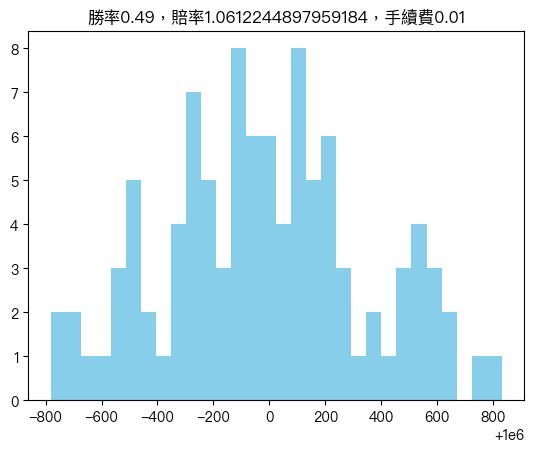

In [ ]:
# 模擬止損止盈策略
win_rate = 0.49
win_once = 1.04
lose_once = 0.98
commission = 0.01
moneys = [casino_fast(win_rate=win_rate, win_once=win_once, lose_once=lose_once, commission=commission) for _ in range(gamblers)]
_ = plt.hist(moneys, bins=30, color='skyblue')
title = f"勝率{win_rate}，賠率{win_once/lose_once}，手續費{commission}"
_ = plt.title(title)
plt.show()

# 大多數人太過關注於勝率，而不關注盈虧比等其他重要因素
# 量化交易的本質是交易，交易的基本法則仍適用